 # 시계열 데이터 특성 및 ETS 모델 이해

## 시계열 데이터 특성
- 시계열 데이터는 몇가지 속성들을 가짐
    - Trends
    - Seasonality
    - Cyclical
    - Noise

### Trends : 경향
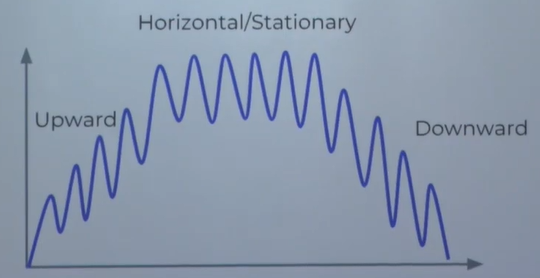
### Seasonality : 반복되는 트랜드
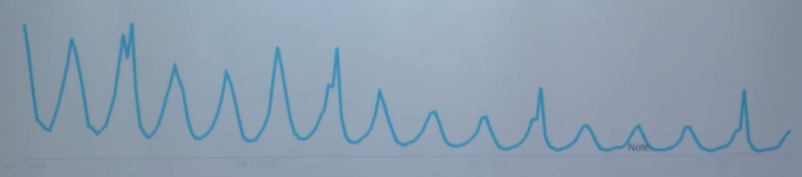
### Cyclical - 일정하지 않은 기간의 트랜드
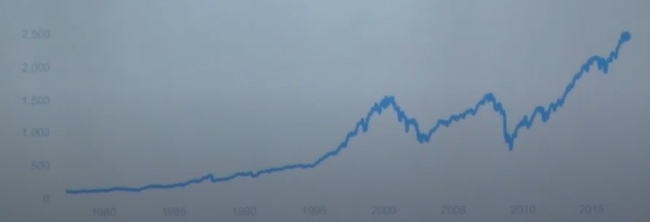
- 패턴이긴 하지만 Long Term 패턴

 ### 예시 1
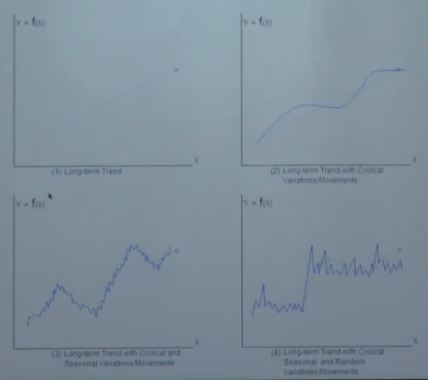

### 예시 2
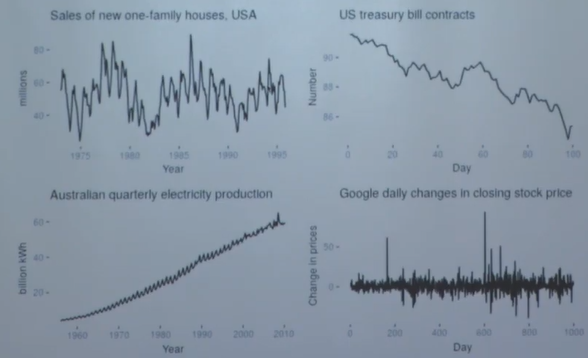

## ETS 모델
- 데이터의 패턴을 더 잘 파악하기 위해 or 예측을 수행하기 위해 **Smoothing** 하는 것
- **Smoothing** 을 위해서 Error, Trend, Seasonality 요소들 활용
    - 각각을 더하거나 곱하여 Smoothing 실행
- 이것들을 가지고 시게열 데이터 모델링 가능

- **ETS Decomposition**
    - ETS 컴포넌트들을 시각화 하는 것은 데이터의 흐름을 이해하는 데 큰 도움이 됨
    - Airline Passengers
    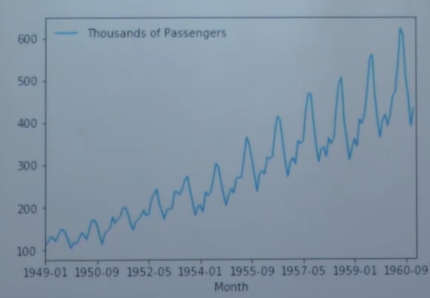
    - Decomposition 예시
    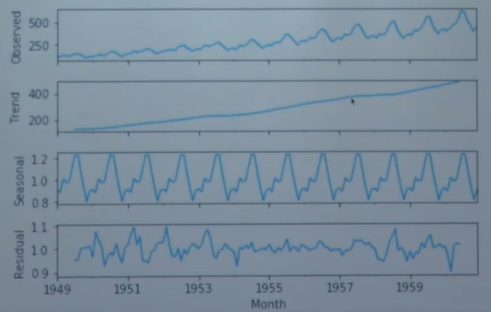

### 실습!

In [ ]:
!pip install statsmodels

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Additive
- 보통 직선의 형태를 보이는 Trend의 경우 'additive'사용  

y_t = Level(Cyclical) + Trend + Seasonality + Noise(Error)  
But, Level 은 Decomposition을 할 수 없음 -> Error 로 들어감  
==>    **y_t =  Error + Trend + Seasonality** 이게 바로 **ETS Modeling**

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
# 상향 트렌드를 가지는 데이터 생성 (random을 통한 노이즈 생성)
series = pd.Series([i + np.random.randint(10) for i in range(1,100)])

In [16]:
# decompose 실행 (additive, period=1 _ period=1은 배열이면 안해도 됨 but series이므로)
result = seasonal_decompose(series, model='additive', period = 1)
# additive : y_t = Error + Trend + Seasonality

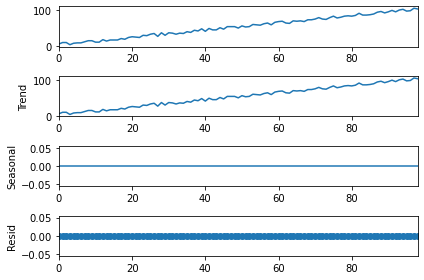

In [17]:
# 결과 확인
result.plot();

In [18]:
# 더 나은 시각화
def plot_decompose(result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8)) # 4rows, 1col
    result.observed.plot(legend=False, ax=ax1) #result의 observed 와 ax1 연결
    ax1.set_ylabel('Observed')
    result.trend.plot(legend=False, ax=ax2)  # 추세
    ax2.set_ylabel('Trend')
    result.seasonal.plot(legend=False, ax=ax3) # 계절
    ax3.set_ylabel('Seasonal')
    result.resid.plot(legend=False, ax=ax4) # Error
    ax4.set_ylabel('Resid')

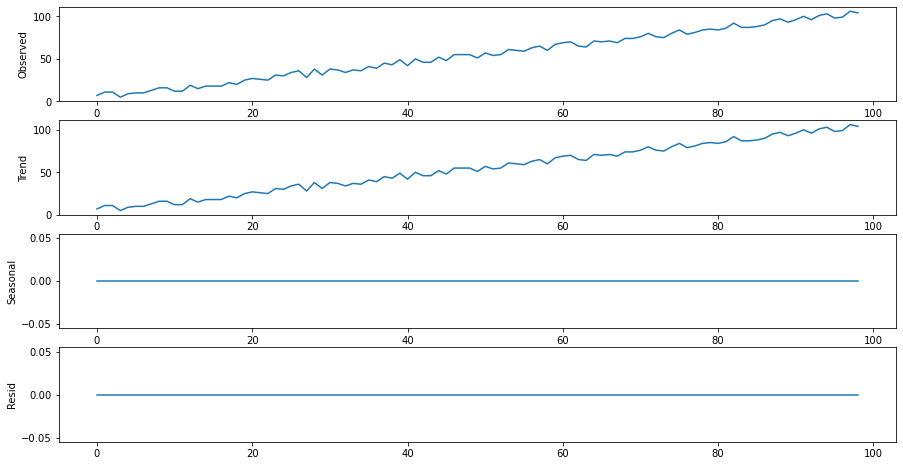

In [19]:
plot_decompose(result)

## Multiply
- 보통 곡선의 형태를 가지고 있는 Trend인 경우 'multiplicative' 사용  

y_t = Level(Cyclical) * Trend * Seasonality * Noise(Error)  
But, Level 은 Decomposition을 할 수 없음 -> Error 로 들어감  
==> y_t = Error * Trend * Seasonality 이게 바로 ETS Modeling  
==> 근데 사실 log(y_t) 로 하면 additive 라고 볼 수도 있음

In [32]:
series2 = pd.Series([i**2+np.random.randint(1000) for i in range(1,100)])

<AxesSubplot:>

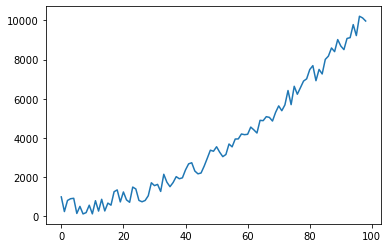

In [33]:
series2.plot()

In [36]:
result2 = seasonal_decompose(series2, model='multiplicative', period=1)

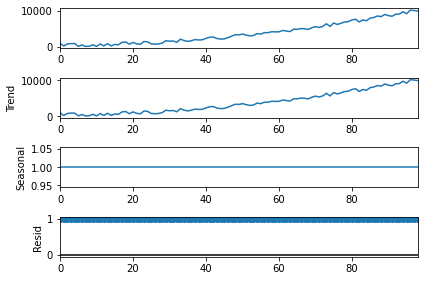

In [38]:
result2.plot();

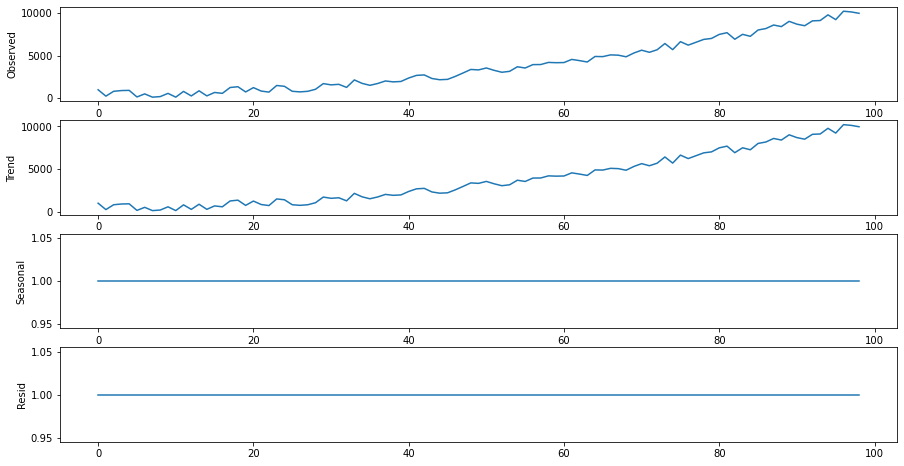

In [35]:
plot_decompose(result2)

## 실제 데이터로 ETS Modeling 진행
- 비행기 탑승 승객 인원수

In [42]:
airline = pd.read_csv('data/airline_passengers.csv', index_col = 'Month') # month 라는 컬럼을 index로

In [43]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


<AxesSubplot:xlabel='Month'>

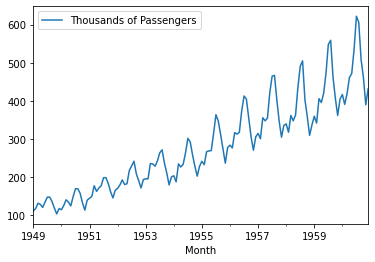

In [49]:
airline.index = pd.to_datetime(airline.index)
airline.plot()

In [55]:
result3 = \
seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

In [56]:
result4 = \
seasonal_decompose(airline['Thousands of Passengers'], model='additive')

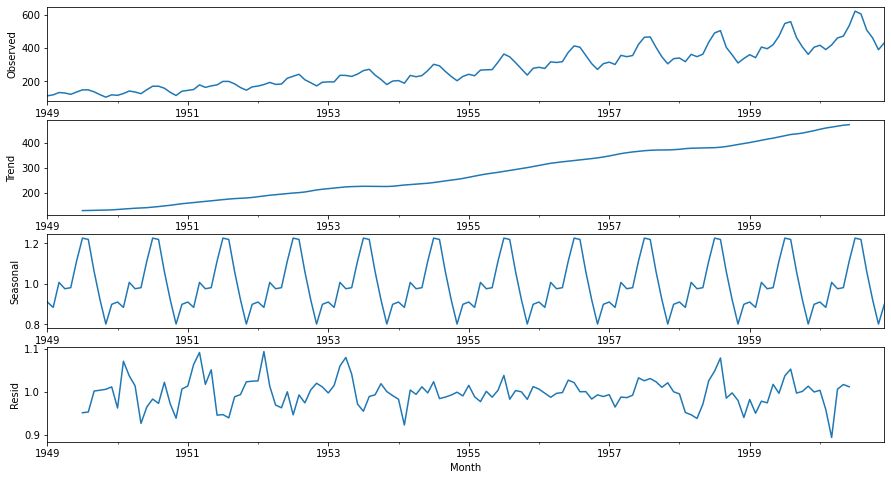

In [57]:
plot_decompose(result3)

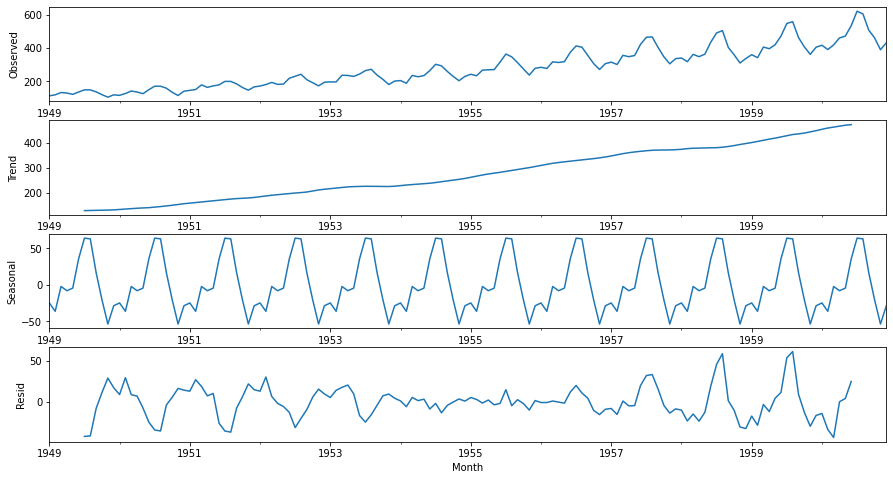

In [58]:
plot_decompose(result4)

시계열 데이터를 모델링하고 분석한다는 것은 Trend, Seasonality를 제거하고 noise(Resid, Cyclical)에서 패턴을 얻어서 모델링한 후 예측 시 다시 그 모델링된 것에 Trend 와 Seasonality를 더해준 후 prediction 진행.

In [71]:
# 따릉이
users = pd.read_csv('data/seoul_bike_users.csv', index_col='date_time')
users = users['number_of_rentals']

In [72]:
users.head()

date_time
2018-04-01    22994
2018-04-02    28139
2018-04-03    26817
2018-04-04    26034
2018-04-05     2833
Name: number_of_rentals, dtype: int64

<AxesSubplot:xlabel='date_time'>

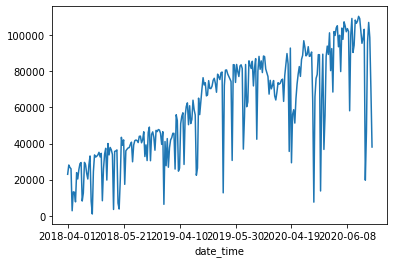

In [73]:
users.plot()

In [77]:
result5 = seasonal_decompose(users, model='multiplicative', period=1)

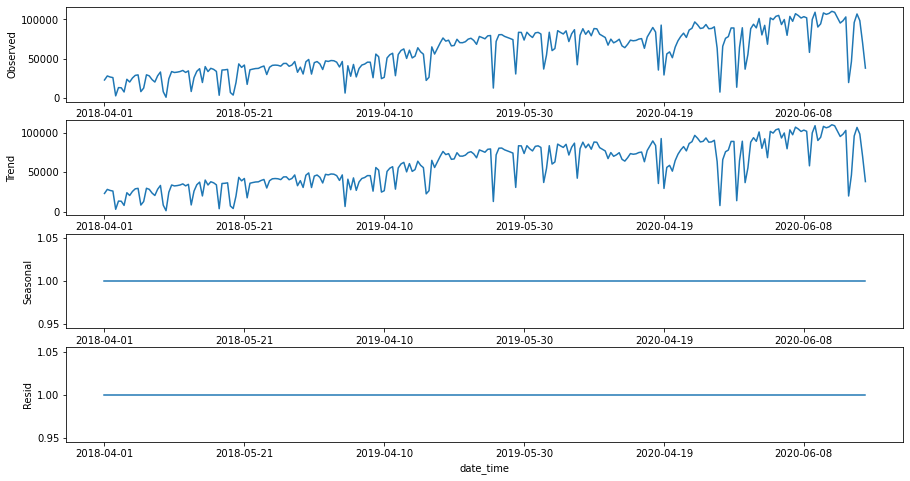

In [78]:
plot_decompose(result5)